<a href="https://colab.research.google.com/github/desbaa32/Master2BD_tp_pro/blob/master/TP4_MLAV__Pertinence_de_donnees_et_hyperparametre_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split

## ***EXERCICE 1*** : Base d'apprentissage et performance du modèle

In [45]:
# Charger les données
print("\nChargement des données...")
X_train_digits = np.load('/content/X_train_digits.npy')
y_train_digits = np.load('/content/y_train_digits.npy')
X_test_digits = np.load('/content/X_test_digits.npy')
y_test_digits = np.load('/content/y_test_digits.npy')

print(f"Shape X_train: {X_train_digits.shape}")
print(f"Shape y_train: {y_train_digits.shape}")
print(f"Shape X_test: {X_test_digits.shape}")
print(f"Shape y_test: {y_test_digits.shape}")



Chargement des données...
Shape X_train: (1257, 64)
Shape y_train: (1257, 10)
Shape X_test: (540, 64)
Shape y_test: (540, 10)


### *Construction du modèle*

In [46]:
# Nombre de pixels par image (8x8 = 64)
input_size = X_train_digits.shape[1]
print(f"\nNombre de pixels par image: {input_size}")

# 1)
model = Sequential([
    # Couche dense avec 16 neurones et activation relu
    Dense(16, activation='relu', input_shape=(input_size,)),
    # Couche de sortie avec 10 neurones (10 chiffres) et activation softmax
    Dense(10, activation='softmax')
])

# 3)
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nArchitecture du modèle:")
model.summary()



Nombre de pixels par image: 64

Architecture du modèle:


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)               │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,210 (4.73 KB)

 Trainable params: 1,210 (4.73 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#4) Évaluation sans entraînement

#a) Prédictions et nombre de prédictions correctes
predictions = model.predict(X_train_digits, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_train_digits, axis=1)
correct_predictions = np.sum(predicted_classes == true_classes)

print(f"\n4a) Nombre de prédictions correctes: {correct_predictions}/{len(y_train_digits)}")

#b) Calcul de l'accuracy
# Méthode 1: Calcul manuel
accuracy_manual = correct_predictions / len(y_train_digits)
print(f"\n4b) Accuracy (méthode manuelle): {accuracy_manual:.4f}")

# Méthode 2: Avec model.evaluate
loss, accuracy_evaluate = model.evaluate(X_train_digits, y_train_digits, verbose=0)
print(f"4b) Accuracy (avec evaluate): {accuracy_evaluate:.4f}")


4a) Nombre de prédictions correctes: 62/1257

4b) Accuracy (méthode manuelle): 0.0493
4b) Accuracy (avec evaluate): 0.0493


### *Performance du modèle*


5) Entraînement du modèle pour 60 périodes...
Epoch 1/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2230 - loss: 3.7836 - val_accuracy: 0.4574 - val_loss: 1.6514
Epoch 2/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4936 - loss: 1.4533 - val_accuracy: 0.5741 - val_loss: 1.3125
Epoch 3/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6146 - loss: 1.0941 - val_accuracy: 0.6111 - val_loss: 1.0163
Epoch 4/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6896 - loss: 0.8743 - val_accuracy: 0.6963 - val_loss: 0.8538
Epoch 5/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7206 - loss: 0.7682 - val_accuracy: 0.7537 - val_loss: 0.7462
Epoch 6/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8042 - loss: 0.6184 - val_accuracy: 0.7907 - val_loss: 0.6083
Epoch 7/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8319 - loss: 0.5047 - val_accuracy: 0.8167 - val_loss: 0.5335
Epoch 8/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8354 - 

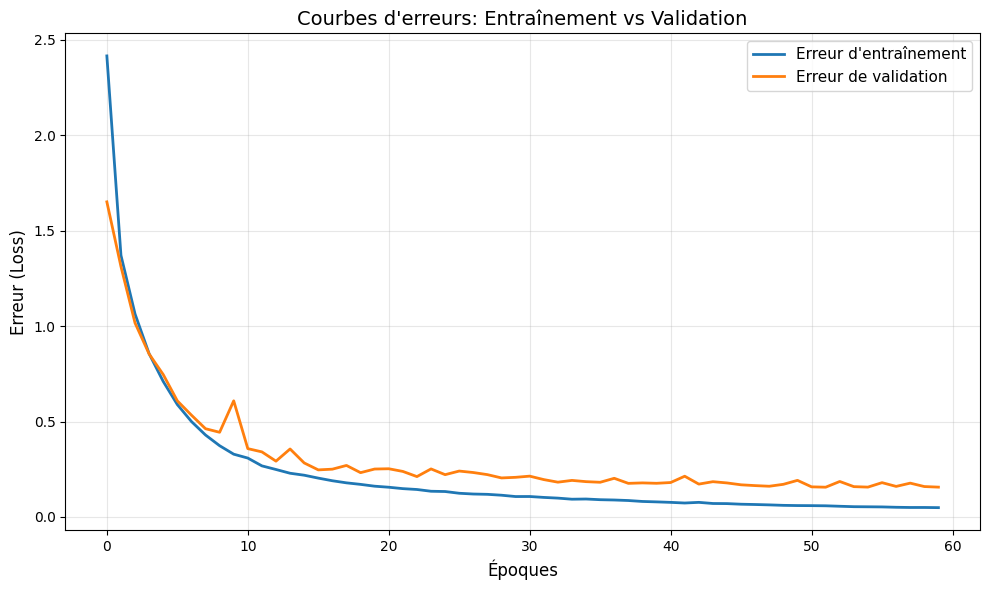


7) Analyse:
  iln' y a pas SURAPPRENTISSAGE (overfitting)
les deux courbes sont proches donc le modèle généralise bien


In [48]:
# 5) Entraîner le modèle pour 60 périodes
print("\n5) Entraînement du modèle pour 60 périodes...")
history = model.fit(
    X_train_digits, y_train_digits,
    validation_data=(X_test_digits, y_test_digits),
    epochs=60,
    verbose=1
)

# 6) Définir la fonction plot_loss
def plot_loss(loss, val_loss):
    """Trace les erreurs d'entraînement et de validation"""
    plt.figure(figsize=(10, 6))
    plt.plot(loss, label='Erreur d\'entraînement', linewidth=2)
    plt.plot(val_loss, label='Erreur de validation', linewidth=2)
    plt.xlabel('Époques', fontsize=12)
    plt.ylabel('Erreur (Loss)', fontsize=12)
    plt.title('Courbes d\'erreurs: Entraînement vs Validation', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Tracer les courbes d'erreurs
print("\n6) Tracé des courbes d'erreurs...")
plot_loss(history.history['loss'], history.history['val_loss'])

# 7) Analyse du surapprentissage
print("\n7) Analyse:")
print("  iln' y a pas SURAPPRENTISSAGE (overfitting)")
print("les deux courbes sont proches donc le modèle généralise bien")

### *Pertinence et proportion des donné*es


In [49]:
# 8) Fusion données d'entraînement et de test
X_digits = np.concatenate([X_train_digits, X_test_digits], axis=0)
y_digits = np.concatenate([y_train_digits, y_test_digits], axis=0)

print(f"\n8) Données fusionnées:")
print(f"   X_digits shape: {X_digits.shape}")
print(f"   y_digits shape: {y_digits.shape}")

# 9)tailles de sous-ensembles
train_sizes = [1257, 1438, 1617, 1708]
print(f"\n9) Tailles de sous-ensembles à tester: {train_sizes}")

# 10-11) Entraîner et évaluer
train_accuracies = []
val_accuracies = []

# Callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

print("\n10-11) Entraînement pour différentes tailles de sous-ensembles...")

for size in train_sizes:
    print(f" \n{'='*20} Taille d'entraînement: {size} {'='*20}")


    # Créer les sous-ensembles
    X_train_sub = X_digits[:size]
    y_train_sub = y_digits[:size]
    X_val_sub = X_digits[size:]
    y_val_sub = y_digits[size:]

    print(f"Train: {X_train_sub.shape[0]} exemples")
    print(f"Validation: {X_val_sub.shape[0]} exemples")

    # Réinitialiser le modèle avec les poids initiaux
    model_sub = Sequential([
        Dense(16, activation='relu', input_shape=(input_size,)),
        Dense(10, activation='softmax')
    ])
    model_sub.compile(
        optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Entraîner
    history_sub = model_sub.fit(
        X_train_sub, y_train_sub,
        validation_data=(X_val_sub, y_val_sub),
        epochs=50,
        callbacks=[early_stopping],
        verbose=0
    )

    # Évaluer
    train_loss, train_acc = model_sub.evaluate(X_train_sub, y_train_sub, verbose=0)
    val_loss, val_acc = model_sub.evaluate(X_val_sub, y_val_sub, verbose=0)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Accuracy entraînement: {train_acc:.4f}")
    print(f"Accuracy validation: {val_acc:.4f}")




8) Données fusionnées:
   X_digits shape: (1797, 64)
   y_digits shape: (1797, 10)

9) Tailles de sous-ensembles à tester: [1257, 1438, 1617, 1708]

10-11) Entraînement pour différentes tailles de sous-ensembles...
 
==================== Taille d'entraînement: 1257 ====================
Train: 1257 exemples
Validation: 540 exemples
Epoch 33: early stopping
Restoring model weights from the end of the best epoch: 28.
Accuracy entraînement: 0.9698
Accuracy validation: 0.9481
 
==================== Taille d'entraînement: 1438 ====================
Train: 1438 exemples
Validation: 359 exemples
Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 23.
Accuracy entraînement: 0.9805
Accuracy validation: 0.9610
 
==================== Taille d'entraînement: 1617 ====================
Train: 1617 exemples
Validation: 180 exemples
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 13.
Accuracy entraînement: 0.9641
Accuracy validation: 0.9444
 


12) Tracé des résultats...


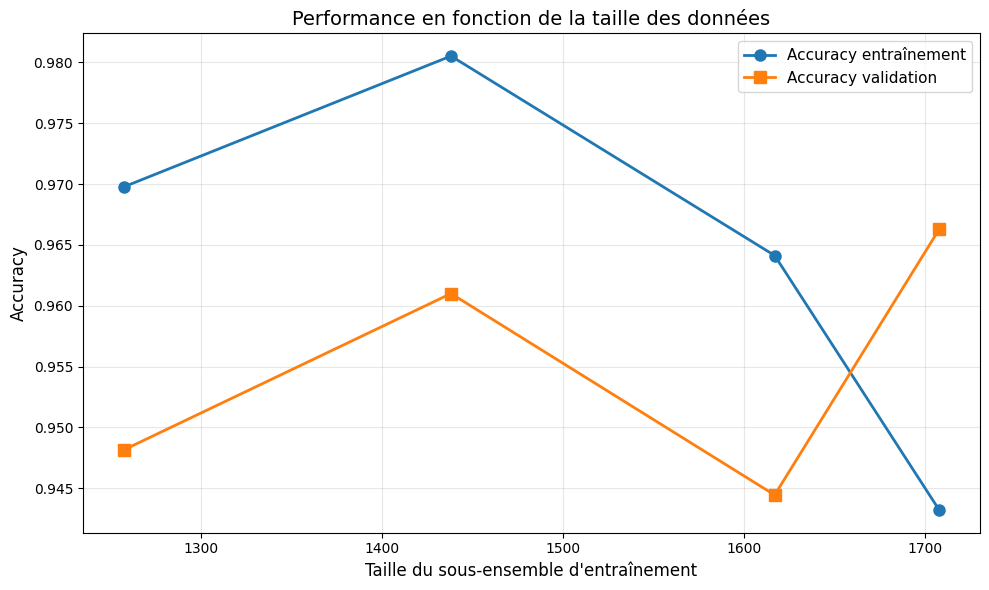

In [50]:
# 12) Définir plot_results et tracer
def plot_results(train_sizes, train_acc, val_acc):
    """Trace l'accuracy en fonction des tailles de sous-ensembles"""
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_acc, 'o-', label='Accuracy entraînement',
             linewidth=2, markersize=8)
    plt.plot(train_sizes, val_acc, 's-', label='Accuracy validation',
             linewidth=2, markersize=8)
    plt.xlabel('Taille du sous-ensemble d\'entraînement', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Performance en fonction de la taille des données', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n12) Tracé des résultats...")
plot_results(train_sizes, train_accuracies, val_accuracies)

## ***EXERCICE 2 :*** Supervision des hyperparamètres


### *Comparaison des fonctions d'activation*


In [51]:
# 1) Définir la fonction get_model
def get_model(activation='relu'):
    """Retourne un modèle avec la fonction d'activation spécifiée"""

    model = Sequential()

    # Gérer LeakyReLU différemment car c'est une couche, pas une fonction
    if activation.lower() == 'leakyrelu':
        model.add(Dense(16, input_shape=(input_size,)))
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Dense(16, activation=activation, input_shape=(input_size,)))

    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# 2) Définir le tableau de fonctions d'activation
activations = ['relu', 'LeakyReLU', 'sigmoid', 'tanh']
print(f"\n2) Fonctions d'activation à tester: {activations}")

# 3-5) Entraînement pour chaque fonction d'activation
histories_acc = {}
histories_loss = {}

print("\n3-5) Entraînement pour chaque fonction d'activation...")

for activation in activations:
    print(f"{'='*20} Activation: {activation} {'='*20}")


    # 3)  modèle
    model_act = get_model(activation)

    # 4) Pour 100 périodes
    history_act = model_act.fit(
        X_train_digits, y_train_digits,
        validation_data=(X_test_digits, y_test_digits),
        epochs=100,
        verbose=0
    )

    # 5) Sauvegarder les historiques
    histories_acc[activation] = history_act.history['val_accuracy']
    histories_loss[activation] = history_act.history['val_loss']

    final_acc = history_act.history['val_accuracy'][-1]
    print(f"Accuracy finale: {final_acc:.4f}")



2) Fonctions d'activation à tester: ['relu', 'LeakyReLU', 'sigmoid', 'tanh']

3-5) Entraînement pour chaque fonction d'activation...
==================== Activation: relu ====================
Accuracy finale: 0.9704
==================== Activation: LeakyReLU ====================


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Accuracy finale: 0.9667
==================== Activation: sigmoid ====================
Accuracy finale: 0.9389
==================== Activation: tanh ====================
Accuracy finale: 0.9296



6) DataFrames créés:

DataFrame Accuracy:
       relu  LeakyReLU   sigmoid      tanh
0  0.581481   0.348148  0.162963  0.288889
1  0.712963   0.561111  0.220370  0.412963
2  0.800000   0.662963  0.277778  0.472222
3  0.861111   0.750000  0.327778  0.564815
4  0.907407   0.775926  0.396296  0.622222

DataFrame Loss:
       relu  LeakyReLU   sigmoid      tanh
0  1.271322   1.858672  2.386835  2.084924
1  0.843280   1.330192  2.279926  1.804733
2  0.586527   1.027743  2.197626  1.640915
3  0.433997   0.818510  2.123116  1.501141
4  0.348545   0.705467  2.061461  1.395841

7) Tracé des courbes de performance...


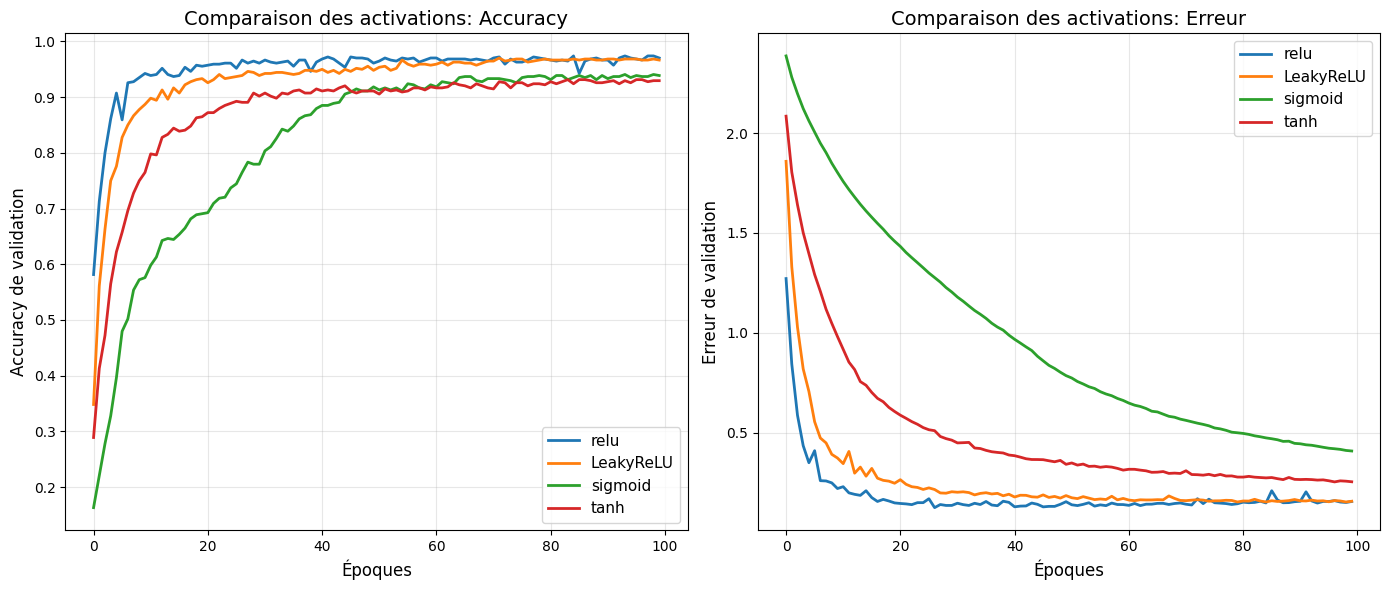

In [52]:

# 6) Créer les dataframes avec pandas
df_acc = pd.DataFrame(histories_acc)
df_loss = pd.DataFrame(histories_loss)

print("\n6) DataFrames créés:")
print("\nDataFrame Accuracy:")
print(df_acc.head())
print("\nDataFrame Loss:")
print(df_loss.head())

# 7) Tracer les courbes de performance
print("\n7) Tracé des courbes de performance...")

# Graphique pour l'accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for activation in activations:
    plt.plot(df_acc[activation], label=activation, linewidth=2)
plt.xlabel('Époques', fontsize=12)
plt.ylabel('Accuracy de validation', fontsize=12)
plt.title('Comparaison des activations: Accuracy', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Graphique pour l'erreur
plt.subplot(1, 2, 2)
for activation in activations:
    plt.plot(df_loss[activation], label=activation, linewidth=2)
plt.xlabel('Époques', fontsize=12)
plt.ylabel('Erreur de validation', fontsize=12)
plt.title('Comparaison des activations: Erreur', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### *Supervision de la taille du Batch*

In [53]:
# 9) Tailles de batch à tester
batch_sizes = [1, 16, 32, 64, 128, 256, 512]
print(f"\n9) Tailles de batch à tester: {batch_sizes}")

batch_accuracies = []
batch_losses = []

print("\n9-10) Entraînement pour différentes tailles de batch...")

for batch_size in batch_sizes:
    print(f"\nBatch size: {batch_size}")

    # 8) Utiliser get_model sans argument
    model_batch = get_model()

    # 9) Entraîner pour 5 périodes
    history_batch = model_batch.fit(
        X_train_digits, y_train_digits,
        validation_data=(X_test_digits, y_test_digits),
        epochs=5,
        batch_size=batch_size,
        verbose=0
    )

    final_acc = history_batch.history['val_accuracy'][-1]
    final_loss = history_batch.history['val_loss'][-1]

    batch_accuracies.append(final_acc)
    batch_losses.append(final_loss)

    print(f"Accuracy finale: {final_acc:.4f}, Loss finale: {final_loss:.4f}")

# 10) Batch size égal à la taille de l'ensemble
print(f"\n10) Batch size = taille de l'ensemble ({len(X_train_digits)})...")
model_full_batch = get_model()
history_full_batch = model_full_batch.fit(
    X_train_digits, y_train_digits,
    validation_data=(X_test_digits, y_test_digits),
    epochs=5,
    batch_size=len(X_train_digits),
    verbose=0
)

batch_sizes.append(len(X_train_digits))
batch_accuracies.append(history_full_batch.history['val_accuracy'][-1])
batch_losses.append(history_full_batch.history['val_loss'][-1])

print(f"Accuracy finale: {batch_accuracies[-1]:.4f}")
print(f"Loss finale: {batch_losses[-1]:.4f}")


9) Tailles de batch à tester: [1, 16, 32, 64, 128, 256, 512]

9-10) Entraînement pour différentes tailles de batch...

Batch size: 1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy finale: 0.2889, Loss finale: 1.7162

Batch size: 16
Accuracy finale: 0.8833, Loss finale: 0.3643

Batch size: 32
Accuracy finale: 0.7870, Loss finale: 0.6045

Batch size: 64
Accuracy finale: 0.7167, Loss finale: 0.8246

Batch size: 128
Accuracy finale: 0.5815, Loss finale: 1.3724

Batch size: 256
Accuracy finale: 0.3741, Loss finale: 1.8039

Batch size: 512
Accuracy finale: 0.2407, Loss finale: 2.1015

10) Batch size = taille de l'ensemble (1257)...
Accuracy finale: 0.1278
Loss finale: 2.9625



11) Visualisation des résultats...


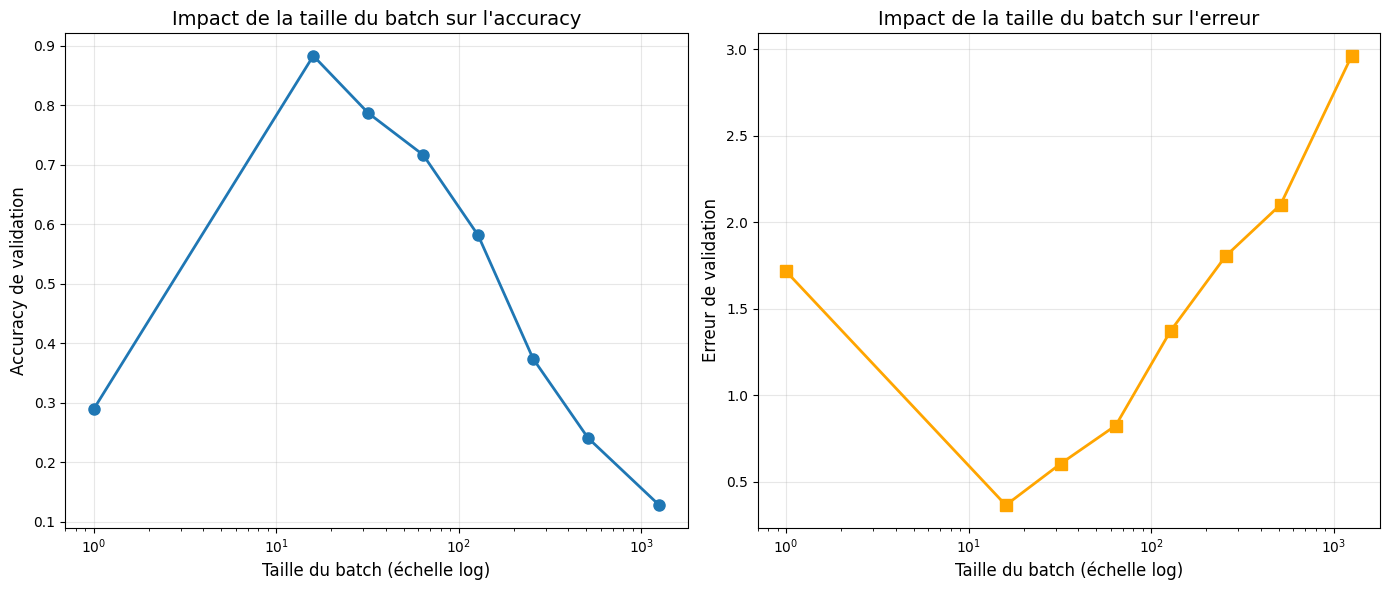

In [54]:
# 11) Afficher les résultats
print("\n11) Visualisation des résultats...")

plt.figure(figsize=(14, 6))

# Accuracy en fonction du batch size
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, batch_accuracies, 'o-', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Taille du batch (échelle log)', fontsize=12)
plt.ylabel('Accuracy de validation', fontsize=12)
plt.title('Impact de la taille du batch sur l\'accuracy', fontsize=14)
plt.grid(True, alpha=0.3)

# Erreur en fonction du batch size
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, batch_losses, 's-', linewidth=2, markersize=8, color='orange')
plt.xscale('log')
plt.xlabel('Taille du batch (échelle log)', fontsize=12)
plt.ylabel('Erreur de validation', fontsize=12)
plt.title('Impact de la taille du batch sur l\'erreur', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()